In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import glob
import pandas as pd
import numpy as np

sns.set(style="whitegrid")
%matplotlib notebook

# Scalability Analysis



We analyze the scalability of the proposed control approach by evaluvating the performance of the agent in sceanrio gamma of the open-storm's benchmarking library. 

## Decide on the random seeds.

We pick 42 random seeds and train the agent for a total of 1000 iteration. These 42 random seeds are maintained consistent for all the scalability simulation.

In [2]:
np.random.seed(42)
seeds = np.random.choice(1000, 42)

In [3]:
seeds

array([102, 435, 860, 270, 106,  71, 700,  20, 614, 121, 466, 214, 330,
       458,  87, 372,  99, 871, 663, 130, 661, 308, 769, 343, 491, 413,
       805, 385, 191, 955, 276, 160, 459, 313,  21, 252, 747, 856, 560,
       474,  58, 510])

In [4]:
np.random.seed(42)
np.random.choice(1000, 42)

array([102, 435, 860, 270, 106,  71, 700,  20, 614, 121, 466, 214, 330,
       458,  87, 372,  99, 871, 663, 130, 661, 308, 769, 343, 491, 413,
       805, 385, 191, 955, 276, 160, 459, 313,  21, 252, 747, 856, 560,
       474,  58, 510])

In [5]:
np.random.seed(42)
np.random.choice(1000, 42)

array([102, 435, 860, 270, 106,  71, 700,  20, 614, 121, 466, 214, 330,
       458,  87, 372,  99, 871, 663, 130, 661, 308, 769, 343, 491, 413,
       805, 385, 191, 955, 276, 160, 459, 313,  21, 252, 747, 856, 560,
       474,  58, 510])

This verifies that seeding works. Now these seeds can be used for running the bayesian optimization 

In [6]:
def extract_performance(controller, path="."):
    metrics = {"time": [], "performance": [], "control_points": []}
    # query all the files with controller names
    reports = glob.glob(path + "/*?[_" + str(controller) + "_]_Scalability_report.txt")
    # parse them to find the compute time and performance for each controller
    for file in reports:
        # open the file
        with open(file, "r") as f:
            content = f.readlines()
        for line in content:
            # if line has optimization time, extract time and append it to array
            if bool(re.match(r"Optimization time:", line)):
                metrics["time"].append(
                    float(re.search(r"\d+\.?\d*", line).__getitem__(0)) / 60.0
                )
            # if line has performance
            if bool(re.match(r"Value at minimum:", line)):
                metrics["performance"].append(
                    float(re.search(r"\d+\.?\d*", line).__getitem__(0))
                )
        metrics["control_points"].append(controller)
    return metrics


# Get the performamce metrics for all the data
controllers = np.linspace(2, 11, 10, dtype=int)
performance = {}
for i in controllers:
    performance[str(i)] = extract_performance(i, "./100_iter_run_mbp2/")

# Create them into a dataframe
simdata = pd.concat(
    [pd.DataFrame.from_dict(performance[i]) for i in performance.keys()],
    ignore_index=True,
)

<IPython.core.display.Javascript object>


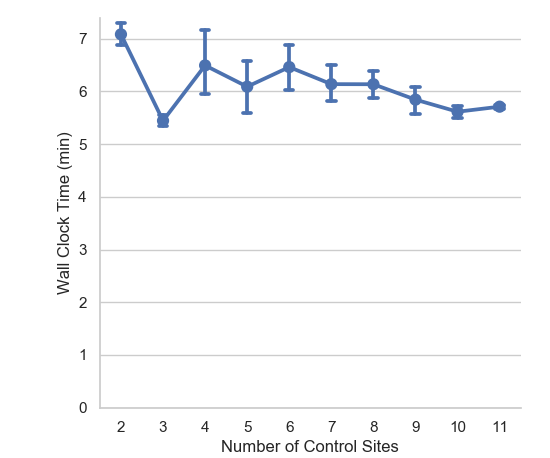

In [9]:
lm = sns.catplot(
    x="control_points",
    y="time",
    data=simdata,
    capsize=0.2,
    height=6,
    aspect=0.75,
    kind="point",
)
ax = lm.axes
ax[0,0].set_ylim(0,)
ax[0,0].set_ylabel("Wall Clock Time (min)")
ax[0,0].set_xlabel("Number of Control Sites")
plt.show()

In [10]:
plt.savefig("./scala.svg")